In [128]:
pip install librosa soundfile  pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import All Important Libraries
import librosa
import soundfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#function for extracting mfcc file, Look at mel spectographs and chromagraphs to get more features
def extract_feature(file_name):
    X,sample_rate = librosa.load(file_name)
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))
    return result

#Define the motions dictionary
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

#Emotions we want to observe
observed_emotions = ['sad', 'angry', 'surprised','calm']

#Load the data and extract features for each sound file
def load_data(test_size = 0.2):
    x, y = [], []
    rootdir = "/Users/nishantacharya/Desktop/EBADL/SER_Folder/Audio_Speech_Actors_01-24/"
    dirs =['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']
    for dr in dirs:
        #print(dr)
        for subdr,drs,fls in os.walk(rootdir+dr+"/"):
            for file in fls:
                file_name = os.path.basename(rootdir+dr+"/"+file)
                emotion = emotions[file_name.split('-')[2]]
                if emotion not in observed_emotions:
                    continue
                feature = extract_feature(rootdir+dr+"/"+file)
                #print(file)
                x.append(feature)
                y.append(emotion)
    return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)

In [3]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

In [4]:
#Shape of train and test set and Number of features extracted
print((x_train.shape[0], x_test.shape[0]))
#print(y_train)
print(f'Features extracted: {x_train.shape[1]}')

(614, 154)
Features extracted: 40


In [5]:
#Initialise Multi Layer Perceptron Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 1000)

In [6]:
model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=1000)

In [7]:
np.unique(np.array(y_train),return_counts = True)

(array(['angry', 'calm', 'sad', 'surprised'], dtype='<U9'),
 array([163, 149, 151, 151]))

In [8]:
#Add the LSTM model description here

In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from numpy import array
from numpy import hstack
import pandas as pd
import math

Using TensorFlow backend.


In [10]:
#Preparing the Data, #Try concatenating all 19 days as training data unit
def prepData(days,split):
    
    path_sr = "/Users/nishantacharya/Desktop/EBADL/Aras/House_A/DAY_"+str(1)+".txt"
    path_rs = "/Users/nishantacharya/Desktop/EBADL/Aras/HD"+str(1)+".csv"
    d_txt = pd.read_csv(path_sr, sep = ' ')
    d_txt.to_csv(path_rs)
        
    d_df = pd.read_csv(path_rs,index_col = 0)
        
    d_df.columns = range(1,23)
    d_df.to_csv(path_rs)
    
    d_df.drop(22,axis=1, inplace=True)
    
    Data_t = d_df.values
    
    #Getting the testing data
    for day in range(2,days+1):
        path_s = "/Users/nishantacharya/Desktop/EBADL/Aras/House_A/DAY_"+str(day)+".txt"
        path_r = "/Users/nishantacharya/Desktop/EBADL/Aras/HD"+str(day)+".csv"
        d_txt = pd.read_csv(path_s, sep = ' ')
        d_txt.to_csv(path_r)
        
        d_df = pd.read_csv(path_r,index_col = 0)
        
        d_df.columns = range(1,23)
        d_df.to_csv(path_r)
        
        d_df.drop(22,axis=1, inplace=True)
        
        Data_t = np.concatenate((Data_t,d_df.values),axis = 0)
        
    
        
    #Getting the training data
    path_sr = "/Users/nishantacharya/Desktop/EBADL/Aras/House_A/DAY_"+str(days+1)+".txt"
    path_rs = "/Users/nishantacharya/Desktop/EBADL/Aras/HD"+str(days+1)+".csv"
    d_txt = pd.read_csv(path_sr, sep = ' ')
    d_txt.to_csv(path_rs)
        
    d_df = pd.read_csv(path_rs,index_col = 0)
        
    d_df.columns = range(1,23)
    d_df.to_csv(path_rs)
    
    d_df.drop(22,axis=1, inplace=True)
    
    Data_r = d_df.values 
    
    
    #Calculating the number of days to test on, current max for training is 19 days and 4 max for testing data, 
    #the emotional data lines ups with a amx of 4 day test data
    total_days = days*split/100
    test_days = math.floor(total_days*(1-split/100))
    
    for day in range(days+1,test_days):
        path_s = "/Users/nishantacharya/Desktop/EBADL/Aras/House_A/DAY_"+str(day)+".txt"
        path_r = "/Users/nishantacharya/Desktop/EBADL/Aras/HD"+str(day)+".csv"
        d_txt = pd.read_csv(path_s, sep = ' ')
        d_txt.to_csv(path_r)
        
        d_df = pd.read_csv(path_r,index_col = 0)
        
        d_df.columns = range(1,23)
        d_df.to_csv(path_r)
        
        d_df.drop(22,axis=1, inplace=True)
        
        Data_r = np.concatenate((Data_r,d_df.values),axis = 0)
        
    #Split now allows for the test split in terms of days
        
    df_t = pd.DataFrame(Data_t,columns = range(1,22))
    
    df_r = pd.DataFrame(Data_r,columns = range(1,22))
    
    train_Y = df_t[21]
    test_Y = df_r[21]

    df_t.drop(21,axis=1,inplace = True)
    df_r.drop(21,axis=1,inplace = True)
    
    train_X = df_t
    test_X = df_r
    
    #Reshaping the input layers
    train_X_val = train_X.values.reshape(train_X.shape[0],1,train_X.shape[1])
    test_X_val = test_X.values.reshape(test_X.shape[0],1,test_X.shape[1])
    
    train_Y_val = train_Y.values
    test_Y_val = test_Y.values
    
    return train_X_val,train_Y_val,test_X_val,test_Y_val

In [11]:
#Loading datasets
days = 19 # Keeping the learning time low, since the model is encoutnering data out fo distribution, is it okay to do that?
split = 80
train_X,train_Y,test_X,test_Y = prepData(days,split)
#There are 3600 secs in an hour and the data is in seconds, that is each input row is a second apart

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [67]:
#Setting up the 4 different models for the gear box approach
sad = Sequential()
sad.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
sad.add(Dense(1))
sad.compile(loss='mae', optimizer='adam')#output layer

angry = Sequential()
angry.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
angry.add(Dense(1))
angry.compile(loss='mae', optimizer='adam')#output layer

surprised = Sequential()
surprised.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
surprised.add(Dense(1))
surprised.compile(loss='mae', optimizer='adam')#output layer

calm = Sequential()
calm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
calm.add(Dense(1))
calm.compile(loss='mae', optimizer='adam')#output layer

In [68]:
#Gear Box implementation
#The assummption being that the activities have been serialised before
#Question: How do you implement the data change, look at how do real time models work
#Current working, the SER model gets trained seprately from the LSTM models but in parallel

#The data sepration is all botched as there no relation between the 2 databases, need to find a way to connect the 2 databases up properly
#, the batch size was too large for the sad LSTM
#Need to update load the model and then fit the model again on the next batch of data
seconds_start = 0 #Seconds to adjust the data
seconds_end = 3600
s_loss = []
a_loss = []
u_loss = []
c_loss = []

y_pred = model.predict(x_train)
#Bifurgating the data, as that can be done during the learning process and the next set of inputs can be learned on
for vval in y_pred:
    #Stopping if going over the data limit
    if seconds_start >= 86399*days:
        break
    if vval == "sad":
        #Model 1 gets trained here for 3600 rows of the data
        print("=========================SAD============================")
        history_s = sad.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=360, batch_size=None, verbose=2, shuffle=False)
        s_loss.extend(history_s.history['loss'])
        #sad.save("/Users/nishantacharya/Desktop/EBADL/sad")
        seconds_start += 3600
        seconds_end += 3600
        
        
    if vval == "angry":
        #Model 2 gets trained here
        print("=========================ANGRY============================")
        history_a = angry.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=360, batch_size= None, verbose=2, shuffle=False)
        a_loss.extend(history_a.history['loss'])
        #angry.save("/Users/nishantacharya/Desktop/EBADL/angry")
        seconds_start += 3600
        seconds_end += 3600
        
        
    if vval == "surprised":
        #Model 3 gets trained here for 3600 secs
        print("=========================SURPRISED============================")
        history_u = surprised.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=360, batch_size=None, verbose=2, shuffle=False)
        u_loss.extend(history_u.history['loss'])
        #surprised.save("/Users/nishantacharya/Desktop/EBADL/surprised")
        seconds_start += 3600
        seconds_end += 3600
        
        
        
    if vval == "calm":
        #Model 4 gets trained here
        print("=========================CALM============================")
        history_c = calm.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=360, batch_size=None, verbose=2, shuffle=False)
        c_loss.extend(history_c.history['loss'])
        #calm.save("/Users/nishantacharya/Desktop/EBADL/calm")
        seconds_start += 3600
        seconds_end += 3600
        
    

=========================SURPRISED============================
Epoch 1/30
 - 1s - loss: 12.9988
Epoch 2/30
 - 0s - loss: 10.9420
Epoch 3/30
 - 0s - loss: 6.1009
Epoch 4/30
 - 0s - loss: 2.8189
Epoch 5/30
 - 0s - loss: 2.5964
Epoch 6/30
 - 0s - loss: 2.4213
Epoch 7/30
 - 0s - loss: 2.2456
Epoch 8/30
 - 0s - loss: 2.1490
Epoch 9/30
 - 0s - loss: 2.0377
Epoch 10/30
 - 0s - loss: 1.9265
Epoch 11/30
 - 0s - loss: 1.7981
Epoch 12/30
 - 0s - loss: 1.6963
Epoch 13/30
 - 0s - loss: 1.5464
Epoch 14/30
 - 0s - loss: 1.5030
Epoch 15/30
 - 0s - loss: 1.4450
Epoch 16/30
 - 0s - loss: 1.4454
Epoch 17/30
 - 0s - loss: 1.4326
Epoch 18/30
 - 0s - loss: 1.4416
Epoch 19/30
 - 0s - loss: 1.4078
Epoch 20/30
 - 0s - loss: 1.4018
Epoch 21/30
 - 0s - loss: 1.3812
Epoch 22/30
 - 0s - loss: 1.3969
Epoch 23/30
 - 0s - loss: 1.3974
Epoch 24/30
 - 0s - loss: 1.3834
Epoch 25/30
 - 0s - loss: 1.3580
Epoch 26/30
 - 0s - loss: 1.3660
Epoch 27/30
 - 0s - loss: 1.3540
Epoch 28/30
 - 0s - loss: 1.3616
Epoch 29/30
 - 0s - 

Epoch 27/30
 - 0s - loss: 0.0039
Epoch 28/30
 - 0s - loss: 0.0019
Epoch 29/30
 - 0s - loss: 0.0019
Epoch 30/30
 - 0s - loss: 0.0039
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 0.0035
Epoch 2/30
 - 0s - loss: 0.0054
Epoch 3/30
 - 0s - loss: 0.0036
Epoch 4/30
 - 0s - loss: 0.0028
Epoch 5/30
 - 0s - loss: 0.0039
Epoch 6/30
 - 0s - loss: 0.0046
Epoch 7/30
 - 0s - loss: 0.0039
Epoch 8/30
 - 0s - loss: 0.0037
Epoch 9/30
 - 0s - loss: 0.0030
Epoch 10/30
 - 0s - loss: 0.0035
Epoch 11/30
 - 0s - loss: 0.0034
Epoch 12/30
 - 0s - loss: 0.0035
Epoch 13/30
 - 0s - loss: 0.0035
Epoch 14/30
 - 0s - loss: 0.0034
Epoch 15/30
 - 0s - loss: 0.0035
Epoch 16/30
 - 0s - loss: 0.0035
Epoch 17/30
 - 0s - loss: 0.0034
Epoch 18/30
 - 0s - loss: 0.0035
Epoch 19/30
 - 0s - loss: 0.0035
Epoch 20/30
 - 0s - loss: 0.0034
Epoch 21/30
 - 0s - loss: 0.0035
Epoch 22/30
 - 0s - loss: 0.0035
Epoch 23/30
 - 0s - loss: 0.0034
Epoch 24/30
 - 0s - loss: 0.0034
Epoch 25/30
 - 0s - lo

 - 0s - loss: 0.0016
Epoch 23/30
 - 0s - loss: 0.0014
Epoch 24/30
 - 0s - loss: 0.0012
Epoch 25/30
 - 0s - loss: 0.0017
Epoch 26/30
 - 0s - loss: 0.0016
Epoch 27/30
 - 0s - loss: 0.0024
Epoch 28/30
 - 0s - loss: 0.0024
Epoch 29/30
 - 0s - loss: 0.0024
Epoch 30/30
 - 0s - loss: 0.0024
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 0.0030
Epoch 2/30
 - 0s - loss: 0.0027
Epoch 3/30
 - 0s - loss: 0.0017
Epoch 4/30
 - 0s - loss: 0.0019
Epoch 5/30
 - 0s - loss: 0.0033
Epoch 6/30
 - 0s - loss: 0.0034
Epoch 7/30
 - 0s - loss: 0.0020
Epoch 8/30
 - 0s - loss: 0.0027
Epoch 9/30
 - 0s - loss: 0.0028
Epoch 10/30
 - 0s - loss: 0.0025
Epoch 11/30
 - 0s - loss: 0.0018
Epoch 12/30
 - 0s - loss: 0.0022
Epoch 13/30
 - 0s - loss: 0.0018
Epoch 14/30
 - 0s - loss: 0.0013
Epoch 15/30
 - 0s - loss: 0.0015
Epoch 16/30
 - 0s - loss: 0.0023
Epoch 17/30
 - 0s - loss: 0.0017
Epoch 18/30
 - 0s - loss: 0.0020
Epoch 19/30
 - 0s - loss: 0.0020
Epoch 20/30
 - 0s - loss: 0.0024
Epoch

Epoch 19/30
 - 0s - loss: 2.5609
Epoch 20/30
 - 0s - loss: 2.5492
Epoch 21/30
 - 0s - loss: 2.5097
Epoch 22/30
 - 0s - loss: 2.4802
Epoch 23/30
 - 0s - loss: 2.4414
Epoch 24/30
 - 0s - loss: 2.4143
Epoch 25/30
 - 0s - loss: 2.4092
Epoch 26/30
 - 0s - loss: 2.4031
Epoch 27/30
 - 0s - loss: 2.3843
Epoch 28/30
 - 0s - loss: 2.3762
Epoch 29/30
 - 0s - loss: 2.3618
Epoch 30/30
 - 0s - loss: 2.3601
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 3.0287
Epoch 2/30
 - 0s - loss: 1.7404
Epoch 3/30
 - 0s - loss: 1.4560
Epoch 4/30
 - 0s - loss: 1.2870
Epoch 5/30
 - 0s - loss: 1.2066
Epoch 6/30
 - 0s - loss: 1.1229
Epoch 7/30
 - 0s - loss: 1.0565
Epoch 8/30
 - 0s - loss: 1.0124
Epoch 9/30
 - 0s - loss: 0.9721
Epoch 10/30
 - 0s - loss: 0.9506
Epoch 11/30
 - 0s - loss: 0.9700
Epoch 12/30
 - 0s - loss: 0.9524
Epoch 13/30
 - 0s - loss: 0.9037
Epoch 14/30
 - 0s - loss: 0.8583
Epoch 15/30
 - 0s - loss: 0.8730
Epoch 16/30
 - 0s - loss: 0.8838
Epoch 17/30
 - 0s - loss: 

 - 0s - loss: 0.0059
Epoch 16/30
 - 0s - loss: 0.0065
Epoch 17/30
 - 0s - loss: 0.0061
Epoch 18/30
 - 0s - loss: 0.0044
Epoch 19/30
 - 0s - loss: 0.0053
Epoch 20/30
 - 0s - loss: 0.0056
Epoch 21/30
 - 0s - loss: 0.0065
Epoch 22/30
 - 0s - loss: 0.0036
Epoch 23/30
 - 0s - loss: 0.0060
Epoch 24/30
 - 0s - loss: 0.0034
Epoch 25/30
 - 0s - loss: 0.0083
Epoch 26/30
 - 0s - loss: 0.0081
Epoch 27/30
 - 0s - loss: 0.0082
Epoch 28/30
 - 0s - loss: 0.0082
Epoch 29/30
 - 0s - loss: 0.0081
Epoch 30/30
 - 0s - loss: 0.0082
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 0.0080
Epoch 2/30
 - 0s - loss: 0.0049
Epoch 3/30
 - 0s - loss: 0.0042
Epoch 4/30
 - 0s - loss: 0.0049
Epoch 5/30
 - 0s - loss: 0.0027
Epoch 6/30
 - 0s - loss: 0.0059
Epoch 7/30
 - 0s - loss: 0.0050
Epoch 8/30
 - 0s - loss: 0.0052
Epoch 9/30
 - 0s - loss: 0.0052
Epoch 10/30
 - 0s - loss: 0.0064
Epoch 11/30
 - 0s - loss: 0.0058
Epoch 12/30
 - 0s - loss: 0.0057
Epoch 13/30
 - 0s - loss: 0.0059
Epoch

Epoch 12/30
 - 0s - loss: 1.8129
Epoch 13/30
 - 0s - loss: 1.7588
Epoch 14/30
 - 0s - loss: 1.6512
Epoch 15/30
 - 0s - loss: 1.5915
Epoch 16/30
 - 0s - loss: 1.4996
Epoch 17/30
 - 0s - loss: 1.4508
Epoch 18/30
 - 0s - loss: 1.4118
Epoch 19/30
 - 0s - loss: 1.3420
Epoch 20/30
 - 0s - loss: 1.2983
Epoch 21/30
 - 0s - loss: 1.2442
Epoch 22/30
 - 0s - loss: 1.2195
Epoch 23/30
 - 0s - loss: 1.1446
Epoch 24/30
 - 0s - loss: 1.1238
Epoch 25/30
 - 0s - loss: 1.1400
Epoch 26/30
 - 0s - loss: 1.1486
Epoch 27/30
 - 0s - loss: 1.1659
Epoch 28/30
 - 0s - loss: 1.1500
Epoch 29/30
 - 0s - loss: 1.1355
Epoch 30/30
 - 0s - loss: 1.1479
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 2.8653
Epoch 2/30
 - 0s - loss: 2.1901
Epoch 3/30
 - 0s - loss: 1.9696
Epoch 4/30
 - 0s - loss: 1.8640
Epoch 5/30
 - 0s - loss: 1.7347
Epoch 6/30
 - 0s - loss: 1.6198
Epoch 7/30
 - 0s - loss: 1.4785
Epoch 8/30
 - 0s - loss: 1.3944
Epoch 9/30
 - 0s - loss: 1.2845
Epoch 10/30
 - 0s - loss: 

Epoch 8/30
 - 0s - loss: 0.9978
Epoch 9/30
 - 0s - loss: 0.9680
Epoch 10/30
 - 0s - loss: 0.9421
Epoch 11/30
 - 0s - loss: 0.9159
Epoch 12/30
 - 0s - loss: 0.8903
Epoch 13/30
 - 0s - loss: 0.8605
Epoch 14/30
 - 0s - loss: 0.8380
Epoch 15/30
 - 0s - loss: 0.8098
Epoch 16/30
 - 0s - loss: 0.7848
Epoch 17/30
 - 0s - loss: 0.7613
Epoch 18/30
 - 0s - loss: 0.7379
Epoch 19/30
 - 0s - loss: 0.7109
Epoch 20/30
 - 0s - loss: 0.6865
Epoch 21/30
 - 0s - loss: 0.6634
Epoch 22/30
 - 0s - loss: 0.6408
Epoch 23/30
 - 0s - loss: 0.6154
Epoch 24/30
 - 0s - loss: 0.5931
Epoch 25/30
 - 0s - loss: 0.5688
Epoch 26/30
 - 0s - loss: 0.5478
Epoch 27/30
 - 0s - loss: 0.5272
Epoch 28/30
 - 0s - loss: 0.5042
Epoch 29/30
 - 0s - loss: 0.4809
Epoch 30/30
 - 0s - loss: 0.4596
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 5.3469
Epoch 2/30
 - 0s - loss: 4.2043
Epoch 3/30
 - 0s - loss: 3.6775
Epoch 4/30
 - 0s - loss: 3.9848
Epoch 5/30
 - 0s - loss: 3.8291
Epoch 6/30
 - 0s - loss:

Epoch 4/30
 - 0s - loss: 0.0037
Epoch 5/30
 - 0s - loss: 0.0037
Epoch 6/30
 - 0s - loss: 0.0036
Epoch 7/30
 - 0s - loss: 0.0050
Epoch 8/30
 - 0s - loss: 0.0035
Epoch 9/30
 - 0s - loss: 0.0034
Epoch 10/30
 - 0s - loss: 0.0062
Epoch 11/30
 - 0s - loss: 0.0043
Epoch 12/30
 - 0s - loss: 0.0041
Epoch 13/30
 - 0s - loss: 0.0042
Epoch 14/30
 - 0s - loss: 0.0039
Epoch 15/30
 - 0s - loss: 0.0039
Epoch 16/30
 - 0s - loss: 0.0039
Epoch 17/30
 - 0s - loss: 0.0039
Epoch 18/30
 - 0s - loss: 0.0039
Epoch 19/30
 - 0s - loss: 0.0040
Epoch 20/30
 - 0s - loss: 0.0037
Epoch 21/30
 - 0s - loss: 0.0040
Epoch 22/30
 - 0s - loss: 0.0041
Epoch 23/30
 - 0s - loss: 0.0038
Epoch 24/30
 - 1s - loss: 0.0040
Epoch 25/30
 - 0s - loss: 0.0041
Epoch 26/30
 - 0s - loss: 0.0040
Epoch 27/30
 - 0s - loss: 0.0041
Epoch 28/30
 - 0s - loss: 0.0045
Epoch 29/30
 - 0s - loss: 0.0048
Epoch 30/30
 - 0s - loss: 0.0047
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 0.0182
Epoch 2/30
 - 0s - loss:

 - 0s - loss: 6.6734
Epoch 2/30
 - 0s - loss: 2.0398
Epoch 3/30
 - 0s - loss: 1.8074
Epoch 4/30
 - 0s - loss: 1.5645
Epoch 5/30
 - 0s - loss: 1.4724
Epoch 6/30
 - 0s - loss: 1.4862
Epoch 7/30
 - 0s - loss: 1.4505
Epoch 8/30
 - 0s - loss: 1.3554
Epoch 9/30
 - 0s - loss: 1.3281
Epoch 10/30
 - 0s - loss: 1.2728
Epoch 11/30
 - 0s - loss: 1.2612
Epoch 12/30
 - 0s - loss: 1.2140
Epoch 13/30
 - 0s - loss: 1.1942
Epoch 14/30
 - 0s - loss: 1.1930
Epoch 15/30
 - 0s - loss: 1.1693
Epoch 16/30
 - 0s - loss: 1.1885
Epoch 17/30
 - 0s - loss: 1.1527
Epoch 18/30
 - 0s - loss: 1.1116
Epoch 19/30
 - 0s - loss: 1.0714
Epoch 20/30
 - 0s - loss: 1.0863
Epoch 21/30
 - 0s - loss: 1.0615
Epoch 22/30
 - 0s - loss: 1.0546
Epoch 23/30
 - 0s - loss: 1.0334
Epoch 24/30
 - 0s - loss: 1.0192
Epoch 25/30
 - 0s - loss: 1.0309
Epoch 26/30
 - 0s - loss: 0.9995
Epoch 27/30
 - 0s - loss: 0.9844
Epoch 28/30
 - 0s - loss: 1.0075
Epoch 29/30
 - 0s - loss: 0.9731
Epoch 30/30
 - 0s - loss: 0.9842
=========================ANGRY

 - 0s - loss: 1.8811
Epoch 30/30
 - 0s - loss: 1.8377
=========================CALM============================
Epoch 1/30
 - 0s - loss: 4.9107
Epoch 2/30
 - 0s - loss: 3.8764
Epoch 3/30
 - 0s - loss: 3.0875
Epoch 4/30
 - 0s - loss: 2.6848
Epoch 5/30
 - 0s - loss: 2.5252
Epoch 6/30
 - 0s - loss: 2.3829
Epoch 7/30
 - 0s - loss: 2.2446
Epoch 8/30
 - 0s - loss: 2.1146
Epoch 9/30
 - 0s - loss: 1.9859
Epoch 10/30
 - 0s - loss: 1.8546
Epoch 11/30
 - 0s - loss: 1.7269
Epoch 12/30
 - 0s - loss: 1.6032
Epoch 13/30
 - 0s - loss: 1.4802
Epoch 14/30
 - 0s - loss: 1.4073
Epoch 15/30
 - 0s - loss: 1.2900
Epoch 16/30
 - 0s - loss: 1.1920
Epoch 17/30
 - 0s - loss: 1.1478
Epoch 18/30
 - 0s - loss: 1.0655
Epoch 19/30
 - 0s - loss: 1.0443
Epoch 20/30
 - 0s - loss: 1.0665
Epoch 21/30
 - 0s - loss: 1.0743
Epoch 22/30
 - 0s - loss: 1.0099
Epoch 23/30
 - 0s - loss: 1.0271
Epoch 24/30
 - 0s - loss: 1.0304
Epoch 25/30
 - 0s - loss: 0.9814
Epoch 26/30
 - 0s - loss: 1.0245
Epoch 27/30
 - 0s - loss: 0.9588
Epoch 

Epoch 26/30
 - 0s - loss: 0.0096
Epoch 27/30
 - 0s - loss: 0.0090
Epoch 28/30
 - 0s - loss: 0.0099
Epoch 29/30
 - 0s - loss: 0.0088
Epoch 30/30
 - 0s - loss: 0.0075
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 2.0550
Epoch 2/30
 - 0s - loss: 1.3645
Epoch 3/30
 - 0s - loss: 1.2960
Epoch 4/30
 - 0s - loss: 1.2872
Epoch 5/30
 - 0s - loss: 1.2127
Epoch 6/30
 - 0s - loss: 1.1545
Epoch 7/30
 - 0s - loss: 1.1231
Epoch 8/30
 - 0s - loss: 1.1189
Epoch 9/30
 - 0s - loss: 1.0917
Epoch 10/30
 - 0s - loss: 1.0546
Epoch 11/30
 - 0s - loss: 1.0268
Epoch 12/30
 - 0s - loss: 0.9999
Epoch 13/30
 - 0s - loss: 0.9694
Epoch 14/30
 - 0s - loss: 0.9606
Epoch 15/30
 - 0s - loss: 0.9355
Epoch 16/30
 - 0s - loss: 0.9269
Epoch 17/30
 - 0s - loss: 0.8920
Epoch 18/30
 - 0s - loss: 0.8744
Epoch 19/30
 - 0s - loss: 0.8670
Epoch 20/30
 - 0s - loss: 0.8487
Epoch 21/30
 - 0s - loss: 0.8301
Epoch 22/30
 - 0s - loss: 0.8093
Epoch 23/30
 - 0s - loss: 0.7897
Epoch 24/30
 - 0s - loss: 

 - 0s - loss: 0.7280
Epoch 23/30
 - 0s - loss: 0.7112
Epoch 24/30
 - 0s - loss: 0.6934
Epoch 25/30
 - 0s - loss: 0.6814
Epoch 26/30
 - 0s - loss: 0.6756
Epoch 27/30
 - 0s - loss: 0.6569
Epoch 28/30
 - 0s - loss: 0.6535
Epoch 29/30
 - 0s - loss: 0.6394
Epoch 30/30
 - 0s - loss: 0.6219
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 2.1935
Epoch 2/30
 - 0s - loss: 1.8629
Epoch 3/30
 - 0s - loss: 1.7677
Epoch 4/30
 - 0s - loss: 1.7150
Epoch 5/30
 - 0s - loss: 1.6767
Epoch 6/30
 - 0s - loss: 1.6498
Epoch 7/30
 - 0s - loss: 1.6082
Epoch 8/30
 - 0s - loss: 1.6045
Epoch 9/30
 - 0s - loss: 1.5983
Epoch 10/30
 - 0s - loss: 1.5465
Epoch 11/30
 - 0s - loss: 1.5387
Epoch 12/30
 - 0s - loss: 1.5031
Epoch 13/30
 - 0s - loss: 1.5047
Epoch 14/30
 - 0s - loss: 1.4673
Epoch 15/30
 - 0s - loss: 1.4386
Epoch 16/30
 - 0s - loss: 1.4249
Epoch 17/30
 - 0s - loss: 1.4153
Epoch 18/30
 - 0s - loss: 1.3737
Epoch 19/30
 - 0s - loss: 1.3956
Epoch 20/30
 - 0s - loss: 1.3597
E

Epoch 19/30
 - 0s - loss: 1.5546
Epoch 20/30
 - 0s - loss: 1.5634
Epoch 21/30
 - 0s - loss: 1.5643
Epoch 22/30
 - 0s - loss: 1.5540
Epoch 23/30
 - 0s - loss: 1.5704
Epoch 24/30
 - 0s - loss: 1.5402
Epoch 25/30
 - 0s - loss: 1.5524
Epoch 26/30
 - 0s - loss: 1.5526
Epoch 27/30
 - 0s - loss: 1.5511
Epoch 28/30
 - 0s - loss: 1.5331
Epoch 29/30
 - 0s - loss: 1.5516
Epoch 30/30
 - 0s - loss: 1.5235
=========================SAD============================
Epoch 1/30
 - 0s - loss: 3.9548
Epoch 2/30
 - 0s - loss: 2.8681
Epoch 3/30
 - 0s - loss: 2.5164
Epoch 4/30
 - 0s - loss: 2.4857
Epoch 5/30
 - 0s - loss: 2.4592
Epoch 6/30
 - 0s - loss: 2.4738
Epoch 7/30
 - 0s - loss: 2.4337
Epoch 8/30
 - 0s - loss: 2.4308
Epoch 9/30
 - 0s - loss: 2.4097
Epoch 10/30
 - 0s - loss: 2.3764
Epoch 11/30
 - 0s - loss: 2.3773
Epoch 12/30
 - 0s - loss: 2.3614
Epoch 13/30
 - 0s - loss: 2.3397
Epoch 14/30
 - 0s - loss: 2.3281
Epoch 15/30
 - 0s - loss: 2.3039
Epoch 16/30
 - 0s - loss: 2.3383
Epoch 17/30
 - 0s - loss: 2.

 - 0s - loss: 0.0046
Epoch 16/30
 - 0s - loss: 0.0045
Epoch 17/30
 - 0s - loss: 0.0036
Epoch 18/30
 - 0s - loss: 0.0038
Epoch 19/30
 - 0s - loss: 0.0022
Epoch 20/30
 - 0s - loss: 0.0018
Epoch 21/30
 - 0s - loss: 0.0018
Epoch 22/30
 - 0s - loss: 0.0018
Epoch 23/30
 - 0s - loss: 0.0032
Epoch 24/30
 - 0s - loss: 0.0037
Epoch 25/30
 - 0s - loss: 0.0031
Epoch 26/30
 - 0s - loss: 0.0034
Epoch 27/30
 - 0s - loss: 0.0018
Epoch 28/30
 - 0s - loss: 0.0018
Epoch 29/30
 - 0s - loss: 0.0031
Epoch 30/30
 - 0s - loss: 0.0047
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 0.1656
Epoch 2/30
 - 0s - loss: 0.0020
Epoch 3/30
 - 0s - loss: 0.0020
Epoch 4/30
 - 0s - loss: 0.0029
Epoch 5/30
 - 0s - loss: 0.0019
Epoch 6/30
 - 0s - loss: 0.0019
Epoch 7/30
 - 0s - loss: 0.0018
Epoch 8/30
 - 0s - loss: 0.0021
Epoch 9/30
 - 0s - loss: 0.0042
Epoch 10/30
 - 0s - loss: 0.0041
Epoch 11/30
 - 0s - loss: 0.0018
Epoch 12/30
 - 0s - loss: 0.0031
Epoch 13/30
 - 0s - loss: 0.0028
E

Epoch 12/30
 - 0s - loss: 0.8876
Epoch 13/30
 - 0s - loss: 0.8839
Epoch 14/30
 - 0s - loss: 0.8787
Epoch 15/30
 - 0s - loss: 0.8699
Epoch 16/30
 - 0s - loss: 0.8907
Epoch 17/30
 - 0s - loss: 0.8808
Epoch 18/30
 - 0s - loss: 0.8798
Epoch 19/30
 - 0s - loss: 0.8825
Epoch 20/30
 - 0s - loss: 0.8973
Epoch 21/30
 - 0s - loss: 0.8894
Epoch 22/30
 - 0s - loss: 0.8779
Epoch 23/30
 - 0s - loss: 0.8722
Epoch 24/30
 - 0s - loss: 0.9025
Epoch 25/30
 - 0s - loss: 0.8766
Epoch 26/30
 - 0s - loss: 0.8799
Epoch 27/30
 - 0s - loss: 0.8749
Epoch 28/30
 - 0s - loss: 0.8753
Epoch 29/30
 - 0s - loss: 0.8998
Epoch 30/30
 - 0s - loss: 0.8906
=========================CALM============================
Epoch 1/30
 - 0s - loss: 5.0388
Epoch 2/30
 - 0s - loss: 4.5990
Epoch 3/30
 - 0s - loss: 4.3817
Epoch 4/30
 - 0s - loss: 4.1431
Epoch 5/30
 - 0s - loss: 3.9170
Epoch 6/30
 - 0s - loss: 3.7867
Epoch 7/30
 - 0s - loss: 3.5715
Epoch 8/30
 - 0s - loss: 3.5474
Epoch 9/30
 - 0s - loss: 3.3932
Epoch 10/30
 - 0s - loss: 3

 - 0s - loss: 0.7718
Epoch 9/30
 - 0s - loss: 0.7378
Epoch 10/30
 - 0s - loss: 0.6733
Epoch 11/30
 - 0s - loss: 0.6176
Epoch 12/30
 - 0s - loss: 0.6473
Epoch 13/30
 - 0s - loss: 0.6056
Epoch 14/30
 - 0s - loss: 0.6565
Epoch 15/30
 - 0s - loss: 0.5954
Epoch 16/30
 - 0s - loss: 0.6026
Epoch 17/30
 - 0s - loss: 0.6281
Epoch 18/30
 - 0s - loss: 0.6042
Epoch 19/30
 - 0s - loss: 0.6060
Epoch 20/30
 - 0s - loss: 0.6128
Epoch 21/30
 - 0s - loss: 0.6044
Epoch 22/30
 - 0s - loss: 0.5929
Epoch 23/30
 - 0s - loss: 0.5949
Epoch 24/30
 - 0s - loss: 0.5788
Epoch 25/30
 - 0s - loss: 0.6151
Epoch 26/30
 - 0s - loss: 0.5483
Epoch 27/30
 - 0s - loss: 0.5368
Epoch 28/30
 - 0s - loss: 0.5487
Epoch 29/30
 - 0s - loss: 0.5748
Epoch 30/30
 - 0s - loss: 0.6141
=========================CALM============================
Epoch 1/30
 - 0s - loss: 3.3926
Epoch 2/30
 - 0s - loss: 3.2923
Epoch 3/30
 - 0s - loss: 3.1855
Epoch 4/30
 - 0s - loss: 3.0947
Epoch 5/30
 - 0s - loss: 3.0331
Epoch 6/30
 - 0s - loss: 2.9662
Epoc

Epoch 4/30
 - 0s - loss: 0.0058
Epoch 5/30
 - 0s - loss: 0.0062
Epoch 6/30
 - 0s - loss: 0.0047
Epoch 7/30
 - 0s - loss: 0.0043
Epoch 8/30
 - 0s - loss: 0.0056
Epoch 9/30
 - 0s - loss: 0.0056
Epoch 10/30
 - 0s - loss: 0.0040
Epoch 11/30
 - 0s - loss: 0.0054
Epoch 12/30
 - 0s - loss: 0.0048
Epoch 13/30
 - 0s - loss: 0.0041
Epoch 14/30
 - 0s - loss: 0.0067
Epoch 15/30
 - 0s - loss: 0.0045
Epoch 16/30
 - 0s - loss: 0.0037
Epoch 17/30
 - 0s - loss: 0.0049
Epoch 18/30
 - 0s - loss: 0.0047
Epoch 19/30
 - 0s - loss: 0.0049
Epoch 20/30
 - 0s - loss: 0.0043
Epoch 21/30
 - 0s - loss: 0.0045
Epoch 22/30
 - 0s - loss: 0.0041
Epoch 23/30
 - 0s - loss: 0.0053
Epoch 24/30
 - 0s - loss: 0.0062
Epoch 25/30
 - 0s - loss: 0.0040
Epoch 26/30
 - 0s - loss: 0.0052
Epoch 27/30
 - 0s - loss: 0.0056
Epoch 28/30
 - 0s - loss: 0.0058
Epoch 29/30
 - 0s - loss: 0.0028
Epoch 30/30
 - 0s - loss: 0.0033
=========================CALM============================
Epoch 1/30
 - 0s - loss: 0.0054
Epoch 2/30
 - 0s - loss: 

 - 0s - loss: 2.1849
Epoch 2/30
 - 0s - loss: 1.2065
Epoch 3/30
 - 0s - loss: 0.8620
Epoch 4/30
 - 0s - loss: 0.5834
Epoch 5/30
 - 0s - loss: 0.3158
Epoch 6/30
 - 0s - loss: 0.2055
Epoch 7/30
 - 0s - loss: 0.2188
Epoch 8/30
 - 0s - loss: 0.1903
Epoch 9/30
 - 0s - loss: 0.1824
Epoch 10/30
 - 0s - loss: 0.1977
Epoch 11/30
 - 0s - loss: 0.1908
Epoch 12/30
 - 0s - loss: 0.2075
Epoch 13/30
 - 0s - loss: 0.1830
Epoch 14/30
 - 0s - loss: 0.1982
Epoch 15/30
 - 0s - loss: 0.1770
Epoch 16/30
 - 0s - loss: 0.1761
Epoch 17/30
 - 0s - loss: 0.1768
Epoch 18/30
 - 0s - loss: 0.1735
Epoch 19/30
 - 0s - loss: 0.1725
Epoch 20/30
 - 0s - loss: 0.1879
Epoch 21/30
 - 0s - loss: 0.1743
Epoch 22/30
 - 0s - loss: 0.1881
Epoch 23/30
 - 0s - loss: 0.1746
Epoch 24/30
 - 0s - loss: 0.1743
Epoch 25/30
 - 0s - loss: 0.1882
Epoch 26/30
 - 0s - loss: 0.1793
Epoch 27/30
 - 0s - loss: 0.1802
Epoch 28/30
 - 0s - loss: 0.1752
Epoch 29/30
 - 0s - loss: 0.1802
Epoch 30/30
 - 0s - loss: 0.1701
=========================SAD==

 - 0s - loss: 1.8106
Epoch 30/30
 - 0s - loss: 1.8573
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 1.2527
Epoch 2/30
 - 0s - loss: 0.9916
Epoch 3/30
 - 0s - loss: 0.7760
Epoch 4/30
 - 0s - loss: 0.5393
Epoch 5/30
 - 0s - loss: 0.3943
Epoch 6/30
 - 0s - loss: 0.3585
Epoch 7/30
 - 0s - loss: 0.3426
Epoch 8/30
 - 0s - loss: 0.3202
Epoch 9/30
 - 0s - loss: 0.3142
Epoch 10/30
 - 0s - loss: 0.3196
Epoch 11/30
 - 0s - loss: 0.3207
Epoch 12/30
 - 0s - loss: 0.2973
Epoch 13/30
 - 0s - loss: 0.3000
Epoch 14/30
 - 0s - loss: 0.2786
Epoch 15/30
 - 0s - loss: 0.2944
Epoch 16/30
 - 0s - loss: 0.2915
Epoch 17/30
 - 0s - loss: 0.2623
Epoch 18/30
 - 0s - loss: 0.2593
Epoch 19/30
 - 0s - loss: 0.2513
Epoch 20/30
 - 0s - loss: 0.2600
Epoch 21/30
 - 0s - loss: 0.2551
Epoch 22/30
 - 0s - loss: 0.2529
Epoch 23/30
 - 0s - loss: 0.2527
Epoch 24/30
 - 0s - loss: 0.2555
Epoch 25/30
 - 0s - loss: 0.2497
Epoch 26/30
 - 0s - loss: 0.2538
Epoch 27/30
 - 0s - loss: 0.2467
Epoch

Epoch 26/30
 - 0s - loss: 0.0049
Epoch 27/30
 - 0s - loss: 0.0041
Epoch 28/30
 - 0s - loss: 0.0052
Epoch 29/30
 - 0s - loss: 0.0035
Epoch 30/30
 - 0s - loss: 0.0036
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 0.0073
Epoch 2/30
 - 0s - loss: 0.0063
Epoch 3/30
 - 0s - loss: 0.0068
Epoch 4/30
 - 0s - loss: 0.0074
Epoch 5/30
 - 0s - loss: 0.0074
Epoch 6/30
 - 0s - loss: 0.0073
Epoch 7/30
 - 0s - loss: 0.0073
Epoch 8/30
 - 0s - loss: 0.0073
Epoch 9/30
 - 0s - loss: 0.0067
Epoch 10/30
 - 0s - loss: 0.0024
Epoch 11/30
 - 0s - loss: 0.0024
Epoch 12/30
 - 0s - loss: 0.0024
Epoch 13/30
 - 0s - loss: 0.0024
Epoch 14/30
 - 0s - loss: 0.0024
Epoch 15/30
 - 0s - loss: 0.0024
Epoch 16/30
 - 0s - loss: 0.0024
Epoch 17/30
 - 0s - loss: 0.0024
Epoch 18/30
 - 0s - loss: 0.0024
Epoch 19/30
 - 0s - loss: 0.0048
Epoch 20/30
 - 0s - loss: 0.0057
Epoch 21/30
 - 0s - loss: 0.0052
Epoch 22/30
 - 0s - loss: 0.0044
Epoch 23/30
 - 0s - loss: 0.0044
Epoch 24/30
 - 0s - lo

Epoch 22/30
 - 0s - loss: 1.7079
Epoch 23/30
 - 0s - loss: 1.6808
Epoch 24/30
 - 0s - loss: 1.6482
Epoch 25/30
 - 0s - loss: 1.6227
Epoch 26/30
 - 0s - loss: 1.5934
Epoch 27/30
 - 0s - loss: 1.5615
Epoch 28/30
 - 0s - loss: 1.5524
Epoch 29/30
 - 0s - loss: 1.5479
Epoch 30/30
 - 0s - loss: 1.5411
=========================CALM============================
Epoch 1/30
 - 0s - loss: 5.8191
Epoch 2/30
 - 0s - loss: 5.4472
Epoch 3/30
 - 0s - loss: 5.3505
Epoch 4/30
 - 0s - loss: 5.3228
Epoch 5/30
 - 0s - loss: 5.2611
Epoch 6/30
 - 0s - loss: 5.2164
Epoch 7/30
 - 0s - loss: 5.1961
Epoch 8/30
 - 0s - loss: 5.1663
Epoch 9/30
 - 0s - loss: 5.1613
Epoch 10/30
 - 0s - loss: 5.1027
Epoch 11/30
 - 0s - loss: 5.0991
Epoch 12/30
 - 0s - loss: 5.0872
Epoch 13/30
 - 0s - loss: 5.0350
Epoch 14/30
 - 0s - loss: 5.0641
Epoch 15/30
 - 0s - loss: 4.9877
Epoch 16/30
 - 0s - loss: 5.0119
Epoch 17/30
 - 0s - loss: 4.9384
Epoch 18/30
 - 0s - loss: 4.9754
Epoch 19/30
 - 0s - loss: 4.9072
Epoch 20/30
 - 0s - loss: 4

 - 0s - loss: 3.2916
Epoch 19/30
 - 0s - loss: 3.3937
Epoch 20/30
 - 0s - loss: 3.3033
Epoch 21/30
 - 0s - loss: 3.2556
Epoch 22/30
 - 0s - loss: 3.3715
Epoch 23/30
 - 0s - loss: 3.3193
Epoch 24/30
 - 0s - loss: 3.3113
Epoch 25/30
 - 0s - loss: 3.2233
Epoch 26/30
 - 0s - loss: 3.3413
Epoch 27/30
 - 0s - loss: 3.2842
Epoch 28/30
 - 0s - loss: 3.2875
Epoch 29/30
 - 0s - loss: 3.3117
Epoch 30/30
 - 0s - loss: 3.2130
=========================SAD============================
Epoch 1/30
 - 0s - loss: 2.4385
Epoch 2/30
 - 0s - loss: 2.2626
Epoch 3/30
 - 0s - loss: 2.2365
Epoch 4/30
 - 0s - loss: 2.1675
Epoch 5/30
 - 0s - loss: 2.1896
Epoch 6/30
 - 0s - loss: 2.1130
Epoch 7/30
 - 0s - loss: 2.0585
Epoch 8/30
 - 0s - loss: 2.0610
Epoch 9/30
 - 0s - loss: 1.9940
Epoch 10/30
 - 0s - loss: 1.9645
Epoch 11/30
 - 0s - loss: 1.9489
Epoch 12/30
 - 0s - loss: 1.9268
Epoch 13/30
 - 0s - loss: 1.8133
Epoch 14/30
 - 0s - loss: 1.7978
Epoch 15/30
 - 0s - loss: 1.7791
Epoch 16/30
 - 0s - loss: 1.7691
Epoch 1

 - 0s - loss: 0.0048
Epoch 15/30
 - 0s - loss: 0.0048
Epoch 16/30
 - 0s - loss: 0.0048
Epoch 17/30
 - 0s - loss: 0.0051
Epoch 18/30
 - 0s - loss: 0.0046
Epoch 19/30
 - 0s - loss: 0.0046
Epoch 20/30
 - 0s - loss: 0.0049
Epoch 21/30
 - 0s - loss: 0.0050
Epoch 22/30
 - 0s - loss: 0.0050
Epoch 23/30
 - 0s - loss: 0.0050
Epoch 24/30
 - 0s - loss: 0.0052
Epoch 25/30
 - 0s - loss: 0.0049
Epoch 26/30
 - 0s - loss: 0.0047
Epoch 27/30
 - 0s - loss: 0.0050
Epoch 28/30
 - 0s - loss: 0.0046
Epoch 29/30
 - 0s - loss: 0.0049
Epoch 30/30
 - 0s - loss: 0.0047
=========================CALM============================
Epoch 1/30
 - 0s - loss: 7.3683
Epoch 2/30
 - 0s - loss: 0.5438
Epoch 3/30
 - 0s - loss: 0.0167
Epoch 4/30
 - 0s - loss: 0.0158
Epoch 5/30
 - 0s - loss: 0.0152
Epoch 6/30
 - 0s - loss: 0.0147
Epoch 7/30
 - 0s - loss: 0.0144
Epoch 8/30
 - 0s - loss: 0.0141
Epoch 9/30
 - 0s - loss: 0.0114
Epoch 10/30
 - 0s - loss: 0.0046
Epoch 11/30
 - 0s - loss: 0.0047
Epoch 12/30
 - 0s - loss: 0.0046
Epoch 

Epoch 11/30
 - 0s - loss: 5.2323
Epoch 12/30
 - 0s - loss: 5.1941
Epoch 13/30
 - 0s - loss: 5.1981
Epoch 14/30
 - 0s - loss: 5.1214
Epoch 15/30
 - 0s - loss: 5.1321
Epoch 16/30
 - 0s - loss: 5.0648
Epoch 17/30
 - 0s - loss: 5.0453
Epoch 18/30
 - 0s - loss: 4.9899
Epoch 19/30
 - 0s - loss: 4.9895
Epoch 20/30
 - 0s - loss: 4.9183
Epoch 21/30
 - 0s - loss: 4.8936
Epoch 22/30
 - 0s - loss: 4.8949
Epoch 23/30
 - 0s - loss: 4.8436
Epoch 24/30
 - 0s - loss: 4.7755
Epoch 25/30
 - 0s - loss: 4.8007
Epoch 26/30
 - 0s - loss: 4.7966
Epoch 27/30
 - 0s - loss: 4.7027
Epoch 28/30
 - 0s - loss: 4.7411
Epoch 29/30
 - 0s - loss: 4.6928
Epoch 30/30
 - 0s - loss: 4.6914
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 3.2947
Epoch 2/30
 - 0s - loss: 2.3356
Epoch 3/30
 - 0s - loss: 1.5558
Epoch 4/30
 - 0s - loss: 1.1390
Epoch 5/30
 - 0s - loss: 0.7482
Epoch 6/30
 - 0s - loss: 0.6162
Epoch 7/30
 - 0s - loss: 0.5880
Epoch 8/30
 - 0s - loss: 0.5528
Epoch 9/30
 - 0s - loss: 

Epoch 7/30
 - 0s - loss: 3.0785
Epoch 8/30
 - 0s - loss: 3.1244
Epoch 9/30
 - 0s - loss: 3.0538
Epoch 10/30
 - 0s - loss: 3.0078
Epoch 11/30
 - 0s - loss: 3.0644
Epoch 12/30
 - 0s - loss: 3.0150
Epoch 13/30
 - 0s - loss: 2.9523
Epoch 14/30
 - 0s - loss: 2.9940
Epoch 15/30
 - 0s - loss: 3.0096
Epoch 16/30
 - 0s - loss: 2.9444
Epoch 17/30
 - 0s - loss: 2.9494
Epoch 18/30
 - 0s - loss: 2.9193
Epoch 19/30
 - 0s - loss: 2.9293
Epoch 20/30
 - 0s - loss: 2.9215
Epoch 21/30
 - 0s - loss: 2.9231
Epoch 22/30
 - 0s - loss: 2.9000
Epoch 23/30
 - 0s - loss: 2.8657
Epoch 24/30
 - 0s - loss: 2.8623
Epoch 25/30
 - 0s - loss: 2.8303
Epoch 26/30
 - 0s - loss: 2.8116
Epoch 27/30
 - 0s - loss: 2.7991
Epoch 28/30
 - 0s - loss: 2.8284
Epoch 29/30
 - 0s - loss: 2.7846
Epoch 30/30
 - 0s - loss: 2.7972
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 2.0148
Epoch 2/30
 - 0s - loss: 1.5003
Epoch 3/30
 - 0s - loss: 1.3407
Epoch 4/30
 - 0s - loss: 1.2032
Epoch 5/30
 - 0s - loss:

Epoch 3/30
 - 0s - loss: 0.0060
Epoch 4/30
 - 0s - loss: 0.0060
Epoch 5/30
 - 0s - loss: 0.0059
Epoch 6/30
 - 0s - loss: 0.0060
Epoch 7/30
 - 0s - loss: 0.0058
Epoch 8/30
 - 0s - loss: 0.0029
Epoch 9/30
 - 0s - loss: 0.0029
Epoch 10/30
 - 0s - loss: 0.0037
Epoch 11/30
 - 0s - loss: 0.0020
Epoch 12/30
 - 0s - loss: 0.0030
Epoch 13/30
 - 0s - loss: 0.0042
Epoch 14/30
 - 0s - loss: 0.0038
Epoch 15/30
 - 0s - loss: 0.0035
Epoch 16/30
 - 0s - loss: 0.0043
Epoch 17/30
 - 0s - loss: 0.0047
Epoch 18/30
 - 0s - loss: 0.0042
Epoch 19/30
 - 0s - loss: 0.0042
Epoch 20/30
 - 0s - loss: 0.0042
Epoch 21/30
 - 0s - loss: 0.0051
Epoch 22/30
 - 0s - loss: 0.0057
Epoch 23/30
 - 0s - loss: 0.0058
Epoch 24/30
 - 0s - loss: 0.0049
Epoch 25/30
 - 0s - loss: 0.0029
Epoch 26/30
 - 0s - loss: 0.0029
Epoch 27/30
 - 0s - loss: 0.0028
Epoch 28/30
 - 0s - loss: 0.0029
Epoch 29/30
 - 0s - loss: 0.0027
Epoch 30/30
 - 0s - loss: 0.0049
=========================ANGRY============================
Epoch 1/30
 - 0s - loss:

=========================CALM============================
Epoch 1/30
 - 0s - loss: 3.9077
Epoch 2/30
 - 0s - loss: 3.2374
Epoch 3/30
 - 0s - loss: 2.6908
Epoch 4/30
 - 0s - loss: 2.1576
Epoch 5/30
 - 0s - loss: 1.6754
Epoch 6/30
 - 0s - loss: 1.1862
Epoch 7/30
 - 0s - loss: 0.9394
Epoch 8/30
 - 0s - loss: 0.9015
Epoch 9/30
 - 0s - loss: 0.9297
Epoch 10/30
 - 0s - loss: 0.8485
Epoch 11/30
 - 0s - loss: 0.8944
Epoch 12/30
 - 0s - loss: 0.8581
Epoch 13/30
 - 0s - loss: 0.8558
Epoch 14/30
 - 0s - loss: 0.8490
Epoch 15/30
 - 0s - loss: 0.8495
Epoch 16/30
 - 0s - loss: 0.8352
Epoch 17/30
 - 0s - loss: 0.8345
Epoch 18/30
 - 0s - loss: 0.8316
Epoch 19/30
 - 0s - loss: 0.8204
Epoch 20/30
 - 0s - loss: 0.8744
Epoch 21/30
 - 0s - loss: 0.8002
Epoch 22/30
 - 0s - loss: 0.8823
Epoch 23/30
 - 0s - loss: 0.8079
Epoch 24/30
 - 0s - loss: 0.7981
Epoch 25/30
 - 0s - loss: 0.7801
Epoch 26/30
 - 0s - loss: 0.7796
Epoch 27/30
 - 0s - loss: 0.7591
Epoch 28/30
 - 0s - loss: 0.7716
Epoch 29/30
 - 0s - loss: 0

 - 0s - loss: 0.5287
Epoch 28/30
 - 0s - loss: 0.4991
Epoch 29/30
 - 0s - loss: 0.5065
Epoch 30/30
 - 0s - loss: 0.4916
=========================CALM============================
Epoch 1/30
 - 0s - loss: 3.0974
Epoch 2/30
 - 0s - loss: 1.5067
Epoch 3/30
 - 0s - loss: 1.2927
Epoch 4/30
 - 0s - loss: 1.2069
Epoch 5/30
 - 0s - loss: 1.0512
Epoch 6/30
 - 0s - loss: 0.9704
Epoch 7/30
 - 0s - loss: 0.8544
Epoch 8/30
 - 0s - loss: 0.7965
Epoch 9/30
 - 0s - loss: 0.7800
Epoch 10/30
 - 0s - loss: 0.7015
Epoch 11/30
 - 0s - loss: 0.6752
Epoch 12/30
 - 0s - loss: 0.6392
Epoch 13/30
 - 0s - loss: 0.5925
Epoch 14/30
 - 0s - loss: 0.5476
Epoch 15/30
 - 0s - loss: 0.5325
Epoch 16/30
 - 0s - loss: 0.5381
Epoch 17/30
 - 0s - loss: 0.5679
Epoch 18/30
 - 0s - loss: 0.5799
Epoch 19/30
 - 0s - loss: 0.5169
Epoch 20/30
 - 0s - loss: 0.5181
Epoch 21/30
 - 0s - loss: 0.5534
Epoch 22/30
 - 0s - loss: 0.5056
Epoch 23/30
 - 0s - loss: 0.5400
Epoch 24/30
 - 0s - loss: 0.4748
Epoch 25/30
 - 0s - loss: 0.4963
Epoch 

Epoch 24/30
 - 0s - loss: 0.0105
Epoch 25/30
 - 0s - loss: 0.0165
Epoch 26/30
 - 0s - loss: 0.0106
Epoch 27/30
 - 0s - loss: 0.0069
Epoch 28/30
 - 0s - loss: 0.0095
Epoch 29/30
 - 0s - loss: 0.0112
Epoch 30/30
 - 0s - loss: 0.0119
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 0.5283
Epoch 2/30
 - 0s - loss: 0.0437
Epoch 3/30
 - 0s - loss: 0.0335
Epoch 4/30
 - 0s - loss: 0.0313
Epoch 5/30
 - 0s - loss: 0.0287
Epoch 6/30
 - 0s - loss: 0.0298
Epoch 7/30
 - 0s - loss: 0.0265
Epoch 8/30
 - 0s - loss: 0.0297
Epoch 9/30
 - 0s - loss: 0.0276
Epoch 10/30
 - 0s - loss: 0.0258
Epoch 11/30
 - 0s - loss: 0.0279
Epoch 12/30
 - 0s - loss: 0.0271
Epoch 13/30
 - 0s - loss: 0.0251
Epoch 14/30
 - 0s - loss: 0.0295
Epoch 15/30
 - 0s - loss: 0.0267
Epoch 16/30
 - 0s - loss: 0.0295
Epoch 17/30
 - 0s - loss: 0.0299
Epoch 18/30
 - 0s - loss: 0.0288
Epoch 19/30
 - 0s - loss: 0.0258
Epoch 20/30
 - 0s - loss: 0.0281
Epoch 21/30
 - 0s - loss: 0.0246
Epoch 22/30
 - 0s - lo

Epoch 20/30
 - 0s - loss: 0.0822
Epoch 21/30
 - 0s - loss: 0.0773
Epoch 22/30
 - 0s - loss: 0.0981
Epoch 23/30
 - 0s - loss: 0.0768
Epoch 24/30
 - 0s - loss: 0.0877
Epoch 25/30
 - 0s - loss: 0.0911
Epoch 26/30
 - 0s - loss: 0.0891
Epoch 27/30
 - 0s - loss: 0.0686
Epoch 28/30
 - 0s - loss: 0.0915
Epoch 29/30
 - 0s - loss: 0.0886
Epoch 30/30
 - 0s - loss: 0.0790
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 2.1438
Epoch 2/30
 - 0s - loss: 1.5375
Epoch 3/30
 - 0s - loss: 1.3215
Epoch 4/30
 - 0s - loss: 1.2928
Epoch 5/30
 - 0s - loss: 1.1718
Epoch 6/30
 - 0s - loss: 1.1080
Epoch 7/30
 - 0s - loss: 1.0660
Epoch 8/30
 - 0s - loss: 0.9701
Epoch 9/30
 - 0s - loss: 0.9146
Epoch 10/30
 - 0s - loss: 0.8484
Epoch 11/30
 - 0s - loss: 0.7867
Epoch 12/30
 - 0s - loss: 0.7053
Epoch 13/30
 - 0s - loss: 0.6796
Epoch 14/30
 - 0s - loss: 0.6319
Epoch 15/30
 - 0s - loss: 0.5899
Epoch 16/30
 - 0s - loss: 0.5314
Epoch 17/30
 - 0s - loss: 0.4964
Epoch 18/30
 - 0s - lo

Epoch 16/30
 - 0s - loss: 0.0028
Epoch 17/30
 - 0s - loss: 0.0028
Epoch 18/30
 - 0s - loss: 0.0029
Epoch 19/30
 - 0s - loss: 0.0029
Epoch 20/30
 - 0s - loss: 0.0027
Epoch 21/30
 - 0s - loss: 0.0027
Epoch 22/30
 - 0s - loss: 0.0027
Epoch 23/30
 - 0s - loss: 0.0027
Epoch 24/30
 - 0s - loss: 0.0027
Epoch 25/30
 - 0s - loss: 0.0027
Epoch 26/30
 - 0s - loss: 0.0027
Epoch 27/30
 - 0s - loss: 0.0027
Epoch 28/30
 - 0s - loss: 0.0027
Epoch 29/30
 - 0s - loss: 0.0027
Epoch 30/30
 - 0s - loss: 0.0028
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 0.0054
Epoch 2/30
 - 0s - loss: 0.0048
Epoch 3/30
 - 0s - loss: 0.0047
Epoch 4/30
 - 0s - loss: 0.0048
Epoch 5/30
 - 0s - loss: 0.0047
Epoch 6/30
 - 0s - loss: 0.0048
Epoch 7/30
 - 0s - loss: 0.0047
Epoch 8/30
 - 0s - loss: 0.0048
Epoch 9/30
 - 0s - loss: 0.0047
Epoch 10/30
 - 0s - loss: 0.0048
Epoch 11/30
 - 0s - loss: 0.0047
Epoch 12/30
 - 0s - loss: 0.0048
Epoch 13/30
 - 0s - loss: 0.0047
Epoch 14/30
 - 0s - lo

 - 0s - loss: 0.0166
Epoch 13/30
 - 0s - loss: 0.0119
Epoch 14/30
 - 0s - loss: 0.0165
Epoch 15/30
 - 0s - loss: 0.0195
Epoch 16/30
 - 0s - loss: 0.0218
Epoch 17/30
 - 0s - loss: 0.0194
Epoch 18/30
 - 0s - loss: 0.0114
Epoch 19/30
 - 0s - loss: 0.0125
Epoch 20/30
 - 0s - loss: 0.0173
Epoch 21/30
 - 0s - loss: 0.0125
Epoch 22/30
 - 0s - loss: 0.0068
Epoch 23/30
 - 0s - loss: 0.0098
Epoch 24/30
 - 0s - loss: 0.0138
Epoch 25/30
 - 0s - loss: 0.0128
Epoch 26/30
 - 0s - loss: 0.0081
Epoch 27/30
 - 0s - loss: 0.0155
Epoch 28/30
 - 0s - loss: 0.0117
Epoch 29/30
 - 0s - loss: 0.0146
Epoch 30/30
 - 0s - loss: 0.0131
=========================SAD============================
Epoch 1/30
 - 0s - loss: 0.3873
Epoch 2/30
 - 0s - loss: 0.3469
Epoch 3/30
 - 0s - loss: 0.2774
Epoch 4/30
 - 0s - loss: 0.2197
Epoch 5/30
 - 0s - loss: 0.1505
Epoch 6/30
 - 0s - loss: 0.0734
Epoch 7/30
 - 0s - loss: 0.0409
Epoch 8/30
 - 0s - loss: 0.0322
Epoch 9/30
 - 0s - loss: 0.0624
Epoch 10/30
 - 0s - loss: 0.0472
Epoch 1

 - 0s - loss: 1.4626
Epoch 9/30
 - 0s - loss: 1.4455
Epoch 10/30
 - 0s - loss: 1.4373
Epoch 11/30
 - 0s - loss: 1.4468
Epoch 12/30
 - 0s - loss: 1.4374
Epoch 13/30
 - 0s - loss: 1.4452
Epoch 14/30
 - 0s - loss: 1.4441
Epoch 15/30
 - 0s - loss: 1.4290
Epoch 16/30
 - 0s - loss: 1.4480
Epoch 17/30
 - 0s - loss: 1.4291
Epoch 18/30
 - 0s - loss: 1.4299
Epoch 19/30
 - 0s - loss: 1.4367
Epoch 20/30
 - 0s - loss: 1.4301
Epoch 21/30
 - 0s - loss: 1.4132
Epoch 22/30
 - 0s - loss: 1.4357
Epoch 23/30
 - 0s - loss: 1.4190
Epoch 24/30
 - 0s - loss: 1.4138
Epoch 25/30
 - 0s - loss: 1.4179
Epoch 26/30
 - 0s - loss: 1.4180
Epoch 27/30
 - 0s - loss: 1.4185
Epoch 28/30
 - 0s - loss: 1.4070
Epoch 29/30
 - 0s - loss: 1.4255
Epoch 30/30
 - 0s - loss: 1.4054
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 5.3397
Epoch 2/30
 - 0s - loss: 2.8980
Epoch 3/30
 - 0s - loss: 1.3528
Epoch 4/30
 - 0s - loss: 1.0131
Epoch 5/30
 - 0s - loss: 1.0366
Epoch 6/30
 - 0s - loss: 0.9255
Epo

Epoch 4/30
 - 0s - loss: 0.7592
Epoch 5/30
 - 0s - loss: 0.7476
Epoch 6/30
 - 0s - loss: 0.5878
Epoch 7/30
 - 0s - loss: 0.5494
Epoch 8/30
 - 0s - loss: 0.4925
Epoch 9/30
 - 0s - loss: 0.4144
Epoch 10/30
 - 0s - loss: 0.3866
Epoch 11/30
 - 0s - loss: 0.3751
Epoch 12/30
 - 0s - loss: 0.3053
Epoch 13/30
 - 0s - loss: 0.3031
Epoch 14/30
 - 0s - loss: 0.2599
Epoch 15/30
 - 0s - loss: 0.2697
Epoch 16/30
 - 0s - loss: 0.1860
Epoch 17/30
 - 0s - loss: 0.2099
Epoch 18/30
 - 0s - loss: 0.1670
Epoch 19/30
 - 0s - loss: 0.1700
Epoch 20/30
 - 0s - loss: 0.1670
Epoch 21/30
 - 0s - loss: 0.1649
Epoch 22/30
 - 0s - loss: 0.1859
Epoch 23/30
 - 0s - loss: 0.1565
Epoch 24/30
 - 0s - loss: 0.1666
Epoch 25/30
 - 0s - loss: 0.1589
Epoch 26/30
 - 0s - loss: 0.1409
Epoch 27/30
 - 0s - loss: 0.1726
Epoch 28/30
 - 0s - loss: 0.1465
Epoch 29/30
 - 0s - loss: 0.1457
Epoch 30/30
 - 0s - loss: 0.1471
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 3.4417
Epoch 2/30
 - 0s - l

 - 0s - loss: 0.0049
Epoch 2/30
 - 0s - loss: 0.0050
Epoch 3/30
 - 0s - loss: 0.0049
Epoch 4/30
 - 0s - loss: 0.0050
Epoch 5/30
 - 0s - loss: 0.0056
Epoch 6/30
 - 0s - loss: 0.0051
Epoch 7/30
 - 0s - loss: 0.0054
Epoch 8/30
 - 0s - loss: 0.0056
Epoch 9/30
 - 0s - loss: 0.0055
Epoch 10/30
 - 0s - loss: 0.0056
Epoch 11/30
 - 0s - loss: 0.0056
Epoch 12/30
 - 0s - loss: 0.0056
Epoch 13/30
 - 0s - loss: 0.0050
Epoch 14/30
 - 0s - loss: 0.0050
Epoch 15/30
 - 0s - loss: 0.0058
Epoch 16/30
 - 0s - loss: 0.0046
Epoch 17/30
 - 0s - loss: 0.0048
Epoch 18/30
 - 0s - loss: 0.0077
Epoch 19/30
 - 0s - loss: 0.0067
Epoch 20/30
 - 0s - loss: 0.0050
Epoch 21/30
 - 0s - loss: 0.0047
Epoch 22/30
 - 0s - loss: 0.0048
Epoch 23/30
 - 0s - loss: 0.0058
Epoch 24/30
 - 0s - loss: 0.0076
Epoch 25/30
 - 0s - loss: 0.0078
Epoch 26/30
 - 0s - loss: 0.0061
Epoch 27/30
 - 0s - loss: 0.0062
Epoch 28/30
 - 0s - loss: 0.0061
Epoch 29/30
 - 0s - loss: 0.0062
Epoch 30/30
 - 0s - loss: 0.0060
=========================SURPR

 - 0s - loss: 5.7722
Epoch 30/30
 - 0s - loss: 5.7741
=========================CALM============================
Epoch 1/30
 - 0s - loss: 2.1190
Epoch 2/30
 - 0s - loss: 1.5301
Epoch 3/30
 - 0s - loss: 1.3640
Epoch 4/30
 - 0s - loss: 1.1971
Epoch 5/30
 - 0s - loss: 1.0561
Epoch 6/30
 - 0s - loss: 0.9418
Epoch 7/30
 - 0s - loss: 0.8420
Epoch 8/30
 - 0s - loss: 0.7470
Epoch 9/30
 - 0s - loss: 0.6445
Epoch 10/30
 - 0s - loss: 0.5598
Epoch 11/30
 - 0s - loss: 0.5163
Epoch 12/30
 - 0s - loss: 0.4823
Epoch 13/30
 - 0s - loss: 0.4764
Epoch 14/30
 - 0s - loss: 0.4501
Epoch 15/30
 - 0s - loss: 0.4445
Epoch 16/30
 - 0s - loss: 0.4532
Epoch 17/30
 - 0s - loss: 0.4392
Epoch 18/30
 - 0s - loss: 0.4367
Epoch 19/30
 - 0s - loss: 0.4221
Epoch 20/30
 - 0s - loss: 0.4112
Epoch 21/30
 - 0s - loss: 0.4012
Epoch 22/30
 - 0s - loss: 0.4318
Epoch 23/30
 - 0s - loss: 0.4470
Epoch 24/30
 - 0s - loss: 0.4027
Epoch 25/30
 - 0s - loss: 0.4316
Epoch 26/30
 - 0s - loss: 0.4047
Epoch 27/30
 - 0s - loss: 0.4151
Epoch 

Epoch 26/30
 - 0s - loss: 0.7201
Epoch 27/30
 - 0s - loss: 0.7145
Epoch 28/30
 - 0s - loss: 0.6996
Epoch 29/30
 - 0s - loss: 0.7134
Epoch 30/30
 - 0s - loss: 0.7028
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 4.8896
Epoch 2/30
 - 0s - loss: 3.7550
Epoch 3/30
 - 0s - loss: 3.3185
Epoch 4/30
 - 0s - loss: 2.9579
Epoch 5/30
 - 0s - loss: 2.6128
Epoch 6/30
 - 0s - loss: 2.3287
Epoch 7/30
 - 0s - loss: 1.9640
Epoch 8/30
 - 0s - loss: 1.5963
Epoch 9/30
 - 0s - loss: 1.3551
Epoch 10/30
 - 0s - loss: 1.1703
Epoch 11/30
 - 0s - loss: 0.9528
Epoch 12/30
 - 0s - loss: 0.8780
Epoch 13/30
 - 0s - loss: 0.8974
Epoch 14/30
 - 0s - loss: 0.8279
Epoch 15/30
 - 0s - loss: 0.8225
Epoch 16/30
 - 0s - loss: 0.7953
Epoch 17/30
 - 0s - loss: 0.8067
Epoch 18/30
 - 0s - loss: 0.7834
Epoch 19/30
 - 0s - loss: 0.7980
Epoch 20/30
 - 0s - loss: 0.7390
Epoch 21/30
 - 0s - loss: 0.8070
Epoch 22/30
 - 0s - loss: 0.7290
Epoch 23/30
 - 0s - loss: 0.7395
Epoch 24/30
 - 0s - lo

Epoch 22/30
 - 0s - loss: 0.0059
Epoch 23/30
 - 0s - loss: 0.0059
Epoch 24/30
 - 0s - loss: 0.0058
Epoch 25/30
 - 0s - loss: 0.0058
Epoch 26/30
 - 0s - loss: 0.0060
Epoch 27/30
 - 0s - loss: 0.0065
Epoch 28/30
 - 0s - loss: 0.0065
Epoch 29/30
 - 0s - loss: 0.0065
Epoch 30/30
 - 0s - loss: 0.0060
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 4.9341
Epoch 2/30
 - 0s - loss: 0.0860
Epoch 3/30
 - 0s - loss: 0.0065
Epoch 4/30
 - 0s - loss: 0.0049
Epoch 5/30
 - 0s - loss: 0.0063
Epoch 6/30
 - 0s - loss: 0.0087
Epoch 7/30
 - 0s - loss: 0.0084
Epoch 8/30
 - 0s - loss: 0.0068
Epoch 9/30
 - 0s - loss: 0.0060
Epoch 10/30
 - 0s - loss: 0.0065
Epoch 11/30
 - 0s - loss: 0.0081
Epoch 12/30
 - 0s - loss: 0.0080
Epoch 13/30
 - 0s - loss: 0.0070
Epoch 14/30
 - 0s - loss: 0.0059
Epoch 15/30
 - 0s - loss: 0.0056
Epoch 16/30
 - 0s - loss: 0.0066
Epoch 17/30
 - 0s - loss: 0.0075
Epoch 18/30
 - 0s - loss: 0.0087
Epoch 19/30
 - 0s - loss: 0.0075
Epoch 20/30
 - 0s - loss: 

 - 0s - loss: 2.2390
Epoch 19/30
 - 0s - loss: 2.2498
Epoch 20/30
 - 0s - loss: 2.2249
Epoch 21/30
 - 0s - loss: 2.1850
Epoch 22/30
 - 0s - loss: 2.1955
Epoch 23/30
 - 0s - loss: 2.1203
Epoch 24/30
 - 0s - loss: 2.1602
Epoch 25/30
 - 0s - loss: 2.0926
Epoch 26/30
 - 0s - loss: 2.1304
Epoch 27/30
 - 0s - loss: 2.0739
Epoch 28/30
 - 0s - loss: 2.0863
Epoch 29/30
 - 0s - loss: 2.0811
Epoch 30/30
 - 0s - loss: 2.0665
=========================SAD============================
Epoch 1/30
 - 0s - loss: 4.1645
Epoch 2/30
 - 0s - loss: 4.0708
Epoch 3/30
 - 0s - loss: 3.4517
Epoch 4/30
 - 0s - loss: 3.4337
Epoch 5/30
 - 0s - loss: 3.1101
Epoch 6/30
 - 0s - loss: 3.0726
Epoch 7/30
 - 0s - loss: 2.9599
Epoch 8/30
 - 0s - loss: 2.7236
Epoch 9/30
 - 0s - loss: 2.7900
Epoch 10/30
 - 0s - loss: 2.3932
Epoch 11/30
 - 0s - loss: 2.5646
Epoch 12/30
 - 0s - loss: 2.3789
Epoch 13/30
 - 0s - loss: 2.2309
Epoch 14/30
 - 0s - loss: 2.0461
Epoch 15/30
 - 0s - loss: 2.1518
Epoch 16/30
 - 0s - loss: 2.0505
Epoch 1

Epoch 15/30
 - 0s - loss: 1.1382
Epoch 16/30
 - 0s - loss: 1.1540
Epoch 17/30
 - 0s - loss: 1.1348
Epoch 18/30
 - 0s - loss: 1.1414
Epoch 19/30
 - 0s - loss: 1.1337
Epoch 20/30
 - 0s - loss: 1.1314
Epoch 21/30
 - 0s - loss: 1.1307
Epoch 22/30
 - 0s - loss: 1.1240
Epoch 23/30
 - 0s - loss: 1.1277
Epoch 24/30
 - 0s - loss: 1.1201
Epoch 25/30
 - 0s - loss: 1.1230
Epoch 26/30
 - 0s - loss: 1.1157
Epoch 27/30
 - 0s - loss: 1.1300
Epoch 28/30
 - 0s - loss: 1.1108
Epoch 29/30
 - 0s - loss: 1.1096
Epoch 30/30
 - 0s - loss: 1.1033
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 8.4658
Epoch 2/30
 - 0s - loss: 2.8175
Epoch 3/30
 - 0s - loss: 2.1469
Epoch 4/30
 - 0s - loss: 1.9280
Epoch 5/30
 - 0s - loss: 1.6906
Epoch 6/30
 - 0s - loss: 1.4950
Epoch 7/30
 - 0s - loss: 1.3033
Epoch 8/30
 - 0s - loss: 1.0998
Epoch 9/30
 - 0s - loss: 0.8881
Epoch 10/30
 - 0s - loss: 0.6682
Epoch 11/30
 - 0s - loss: 0.4796
Epoch 12/30
 - 0s - loss: 0.3401
Epoch 13/30
 - 0s - loss: 

 - 0s - loss: 0.0134
Epoch 12/30
 - 0s - loss: 0.0133
Epoch 13/30
 - 0s - loss: 0.0132
Epoch 14/30
 - 0s - loss: 0.0131
Epoch 15/30
 - 0s - loss: 0.0130
Epoch 16/30
 - 0s - loss: 0.0129
Epoch 17/30
 - 0s - loss: 0.0129
Epoch 18/30
 - 0s - loss: 0.0128
Epoch 19/30
 - 0s - loss: 0.0128
Epoch 20/30
 - 0s - loss: 0.0127
Epoch 21/30
 - 0s - loss: 0.0127
Epoch 22/30
 - 0s - loss: 0.0127
Epoch 23/30
 - 0s - loss: 0.0126
Epoch 24/30
 - 0s - loss: 0.0126
Epoch 25/30
 - 0s - loss: 0.0126
Epoch 26/30
 - 0s - loss: 0.0103
Epoch 27/30
 - 0s - loss: 0.0048
Epoch 28/30
 - 0s - loss: 0.0045
Epoch 29/30
 - 0s - loss: 0.0048
Epoch 30/30
 - 0s - loss: 0.0070
=========================SURPRISED============================
Epoch 1/30
 - 0s - loss: 0.1962
Epoch 2/30
 - 0s - loss: 0.0167
Epoch 3/30
 - 0s - loss: 0.0145
Epoch 4/30
 - 0s - loss: 0.0132
Epoch 5/30
 - 0s - loss: 0.0123
Epoch 6/30
 - 0s - loss: 0.0097
Epoch 7/30
 - 0s - loss: 0.0081
Epoch 8/30
 - 0s - loss: 0.0087
Epoch 9/30
 - 0s - loss: 0.0079
E

Epoch 8/30
 - 0s - loss: 0.0042
Epoch 9/30
 - 0s - loss: 0.0041
Epoch 10/30
 - 0s - loss: 0.0050
Epoch 11/30
 - 0s - loss: 0.0040
Epoch 12/30
 - 0s - loss: 0.0027
Epoch 13/30
 - 0s - loss: 0.0026
Epoch 14/30
 - 0s - loss: 0.0026
Epoch 15/30
 - 0s - loss: 0.0026
Epoch 16/30
 - 0s - loss: 0.0026
Epoch 17/30
 - 0s - loss: 0.0026
Epoch 18/30
 - 0s - loss: 0.0036
Epoch 19/30
 - 0s - loss: 0.0050
Epoch 20/30
 - 0s - loss: 0.0035
Epoch 21/30
 - 0s - loss: 0.0031
Epoch 22/30
 - 0s - loss: 0.0030
Epoch 23/30
 - 0s - loss: 0.0031
Epoch 24/30
 - 0s - loss: 0.0029
Epoch 25/30
 - 0s - loss: 0.0030
Epoch 26/30
 - 0s - loss: 0.0030
Epoch 27/30
 - 0s - loss: 0.0029
Epoch 28/30
 - 0s - loss: 0.0029
Epoch 29/30
 - 0s - loss: 0.0028
Epoch 30/30
 - 0s - loss: 0.0028
=========================ANGRY============================
Epoch 1/30
 - 0s - loss: 0.0020
Epoch 2/30
 - 0s - loss: 0.0020
Epoch 3/30
 - 0s - loss: 0.0020
Epoch 4/30
 - 0s - loss: 0.0020
Epoch 5/30
 - 0s - loss: 0.0020
Epoch 6/30
 - 0s - loss:

Epoch 4/30
 - 0s - loss: 0.6856
Epoch 5/30
 - 0s - loss: 0.6518
Epoch 6/30
 - 0s - loss: 0.6401
Epoch 7/30
 - 0s - loss: 0.6447
Epoch 8/30
 - 0s - loss: 0.6598
Epoch 9/30
 - 0s - loss: 0.6178
Epoch 10/30
 - 0s - loss: 0.6796
Epoch 11/30
 - 0s - loss: 0.5966
Epoch 12/30
 - 0s - loss: 0.6564
Epoch 13/30
 - 0s - loss: 0.6125
Epoch 14/30
 - 0s - loss: 0.6759
Epoch 15/30
 - 0s - loss: 0.5842
Epoch 16/30
 - 0s - loss: 0.6430
Epoch 17/30
 - 0s - loss: 0.5905
Epoch 18/30
 - 0s - loss: 0.6452
Epoch 19/30
 - 0s - loss: 0.6187
Epoch 20/30
 - 0s - loss: 0.6333
Epoch 21/30
 - 0s - loss: 0.6322
Epoch 22/30
 - 0s - loss: 0.5842
Epoch 23/30
 - 0s - loss: 0.6427
Epoch 24/30
 - 0s - loss: 0.6028
Epoch 25/30
 - 0s - loss: 0.6694
Epoch 26/30
 - 0s - loss: 0.5926
Epoch 27/30
 - 0s - loss: 0.6189
Epoch 28/30
 - 0s - loss: 0.6141
Epoch 29/30
 - 0s - loss: 0.6268
Epoch 30/30
 - 0s - loss: 0.5872
=========================SAD============================
Epoch 1/30
 - 0s - loss: 4.8235
Epoch 2/30
 - 0s - loss: 3

In [18]:
#The plots are for the sequential learning of the model
from matplotlib import pyplot

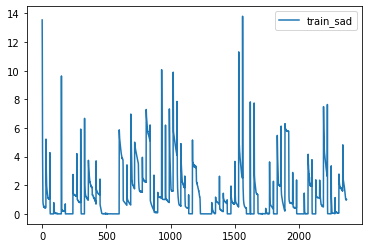

In [70]:
pyplot.plot(s_loss, label='train_sad')
pyplot.legend()
pyplot.show()

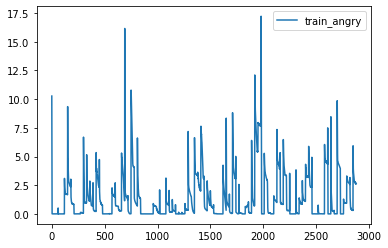

In [71]:
pyplot.plot(a_loss, label='train_angry')
pyplot.legend()
pyplot.show()

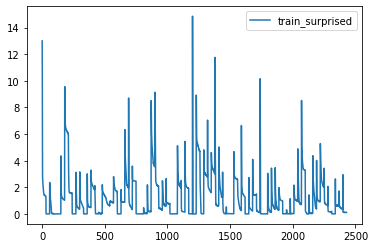

In [72]:
pyplot.plot(u_loss, label='train_surprised')
pyplot.legend()
pyplot.show()

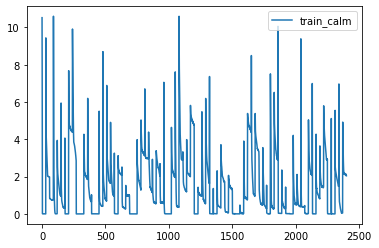

In [73]:
pyplot.plot(c_loss, label='train_calm')
pyplot.legend()
pyplot.show()

In [74]:
#Try seprating the data and attaching it onto one cohesive dataframe, .fit does keep the model weights in mmind but the 
#Final evaluation of a model may not be shown accordingly

In [75]:
#The issue is that there is no connnection between the 2 datasets, but even with data, there will be no real connection
#Unless there is an underlying theory that connects them, and by them I mean each action
#So a simulation to provide different approaches for integrating emotional data is as good as any

In [76]:
#One way to adjust to this is by seprating the training data properly and making sure each activity is mapped
#accordingly
#The whole thing  needs to add properly, there needs to be a relation between the activities, work on a single case simulation
#such that each activity is different and run with that one case, but this will require other ways
#of proving the model and context's accuracy
type(train_X)

numpy.ndarray

In [13]:
#Merging the databases for getting the data middle inflexions in the data out
Data_s_t = np.array([])
Data_a_t = np.array([])
Data_u_t = np.array([])
Data_c_t = np.array([])

Data_s_s = np.array([])
Data_a_s = np.array([])
Data_u_s = np.array([])
Data_c_s = np.array([])

In [14]:
#Bifurgating the data, as that can be done during the learning process and the next set of inputs can be learned on
seconds_start = 0 #Seconds to adjust the data
seconds_end = 3600
y_pred = model.predict(x_train)
for vval in y_pred:
    #Stopping if going over the data limit
    if seconds_start >= 86399*days:
        break
    if vval == "sad":
        #Model 1 gets trained here for 3600 rows of the data
        print("=========================SAD============================")
        #history_s = sad.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=30, batch_size=36, verbose=2, shuffle=False)
        #s_loss.extend(history_s.history['loss'])
        #sad.save("/Users/nishantacharya/Desktop/EBADL/sad")
        
        if Data_s_t.size == 0:
            Data_s_t = train_X[seconds_start:seconds_end]
            Data_s_s = train_Y[seconds_start:seconds_end]
        else:
            Data_s_t = np.concatenate((Data_s_t,train_X[seconds_start:seconds_end]),axis = 0)
            Data_s_s = np.concatenate((Data_s_s,train_Y[seconds_start:seconds_end]),axis = 0)
        
        seconds_start += 3600
        seconds_end += 3600
        
        
    if vval == "angry":
        #Model 2 gets trained here
        print("=========================ANGRY============================")
        #history_a = angry.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=30, batch_size= 36, verbose=2, shuffle=False)
        #a_loss.extend(history_a.history['loss'])
        #angry.save("/Users/nishantacharya/Desktop/EBADL/angry")
        
        if Data_a_t.size == 0:
            Data_a_t = train_X[seconds_start:seconds_end]
            Data_a_s = train_Y[seconds_start:seconds_end]
        else:
            Data_a_t = np.concatenate((Data_a_t,train_X[seconds_start:seconds_end]),axis = 0)
            Data_a_s = np.concatenate((Data_a_s,train_Y[seconds_start:seconds_end]),axis = 0)
        
        seconds_start += 3600
        seconds_end += 3600
        
        
    if vval == "surprised":
        #Model 3 gets trained here for 3600 secs
        print("=========================SURPRISED============================")
        #history_u = surprised.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=30, batch_size=36, verbose=2, shuffle=False)
        #u_loss.extend(history_u.history['loss'])
        #surprised.save("/Users/nishantacharya/Desktop/EBADL/surprised")
        
        if Data_u_t.size == 0:
            Data_u_t = train_X[seconds_start:seconds_end]
            Data_u_s = train_Y[seconds_start:seconds_end]
        else:
            Data_u_t = np.concatenate((Data_u_t,train_X[seconds_start:seconds_end]),axis = 0)
            Data_u_s = np.concatenate((Data_u_s,train_Y[seconds_start:seconds_end]),axis = 0)
        
        
        seconds_start += 3600
        seconds_end += 3600
        
        
        
    if vval == "calm":
        #Model 4 gets trained here
        print("=========================CALM============================")
        #history_c = calm.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=30, batch_size=36, verbose=2, shuffle=False)
        #c_loss.extend(history_c.history['loss'])
        #calm.save("/Users/nishantacharya/Desktop/EBADL/calm")
        
        if Data_c_t.size == 0:
            Data_c_t = train_X[seconds_start:seconds_end]
            Data_c_s = train_Y[seconds_start:seconds_end]
        else:
            Data_c_t = np.concatenate((Data_c_t,train_X[seconds_start:seconds_end]),axis = 0)
            Data_c_s = np.concatenate((Data_c_s,train_Y[seconds_start:seconds_end]),axis = 0)
        
        
        seconds_start += 3600
        seconds_end += 3600

=========================SURPRISED============================
=========================SAD============================
=========================SAD============================
=========================ANGRY============================
=========================SURPRISED============================
=========================ANGRY============================
=========================SAD============================
=========================SURPRISED============================
=========================SURPRISED============================
=========================SURPRISED============================
=========================SAD============================
=========================SAD============================
=========================ANGRY============================
=========================ANGRY============================
=========================ANGRY============================
=========================SAD============================
=========================ANGRY==================

=========================SURPRISED============================
=========================ANGRY============================
=========================SAD============================
=========================ANGRY============================
=========================ANGRY============================
=========================SAD============================
=========================CALM============================
=========================CALM============================
=========================CALM============================
=========================ANGRY============================
=========================ANGRY============================
=========================ANGRY============================
=========================SAD============================
=========================CALM============================
=========================ANGRY============================
=========================CALM============================
=========================SURPRISED============================


=========================SAD============================
=========================SAD============================
=========================ANGRY============================
=========================ANGRY============================
=========================CALM============================
=========================SAD============================
=========================SURPRISED============================
=========================SURPRISED============================
=========================ANGRY============================
=========================SAD============================
=========================ANGRY============================
=========================SAD============================
=========================SAD============================
=========================ANGRY============================
=========================SURPRISED============================
=========================SAD============================
=========================SAD============================
==

In [15]:
#Creating the models for the joint data approach
sad = Sequential()
sad.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
sad.add(Dense(1))
sad.compile(loss='mae', optimizer='adam')#output layer

angry = Sequential()
angry.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
angry.add(Dense(1))
angry.compile(loss='mae', optimizer='adam')#output layer

surprised = Sequential()
surprised.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
surprised.add(Dense(1))
surprised.compile(loss='mae', optimizer='adam')#output layer

calm = Sequential()
calm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
calm.add(Dense(1))
calm.compile(loss='mae', optimizer='adam')#output layer

2022-05-18 09:55:50.880293: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-05-18 09:55:50.904572: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fbf95b5bd90 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-18 09:55:50.904587: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [16]:
#Training
#The 3600 batch size is new, train again
history_s = sad.fit(Data_s_t, Data_s_s, epochs=360, verbose=2, shuffle=False)
history_a = angry.fit(Data_a_t, Data_a_s, epochs=360, verbose=2, shuffle=False)
history_u = surprised.fit(Data_u_t, Data_u_s, epochs=360, verbose=2, shuffle=False)
history_c = calm.fit(Data_c_t, Data_c_s, epochs=360, batch_size=72, verbose=2, shuffle=False)

Epoch 1/100
 - 11s - loss: 3.6364
Epoch 2/100
 - 10s - loss: 3.1935
Epoch 3/100
 - 11s - loss: 3.1320
Epoch 4/100
 - 10s - loss: 3.0038
Epoch 5/100
 - 10s - loss: 2.8971
Epoch 6/100
 - 10s - loss: 2.8503
Epoch 7/100
 - 11s - loss: 2.8362
Epoch 8/100
 - 10s - loss: 2.8152
Epoch 9/100
 - 10s - loss: 2.7860
Epoch 10/100
 - 9s - loss: 2.7811
Epoch 11/100
 - 10s - loss: 2.7632
Epoch 12/100
 - 12s - loss: 2.7493
Epoch 13/100
 - 12s - loss: 2.7544
Epoch 14/100
 - 10s - loss: 2.7251
Epoch 15/100
 - 10s - loss: 2.7270
Epoch 16/100
 - 10s - loss: 2.7238
Epoch 17/100
 - 11s - loss: 2.7264
Epoch 18/100
 - 10s - loss: 2.7226
Epoch 19/100
 - 10s - loss: 2.7185
Epoch 20/100
 - 10s - loss: 2.7136
Epoch 21/100
 - 10s - loss: 2.7088
Epoch 22/100
 - 10s - loss: 2.7034
Epoch 23/100
 - 9s - loss: 2.7016
Epoch 24/100
 - 9s - loss: 2.6917
Epoch 25/100
 - 10s - loss: 2.6886
Epoch 26/100
 - 10s - loss: 2.6898
Epoch 27/100
 - 9s - loss: 2.6772
Epoch 28/100
 - 9s - loss: 2.6668
Epoch 29/100
 - 9s - loss: 2.6672


Epoch 41/100
 - 4s - loss: 2.3972
Epoch 42/100
 - 4s - loss: 2.3981
Epoch 43/100
 - 4s - loss: 2.3990
Epoch 44/100
 - 4s - loss: 2.3865
Epoch 45/100
 - 4s - loss: 2.3935
Epoch 46/100
 - 4s - loss: 2.3828
Epoch 47/100
 - 4s - loss: 2.3937
Epoch 48/100
 - 4s - loss: 2.3760
Epoch 49/100
 - 4s - loss: 2.3801
Epoch 50/100
 - 4s - loss: 2.3834
Epoch 51/100
 - 4s - loss: 2.3882
Epoch 52/100
 - 4s - loss: 2.3779
Epoch 53/100
 - 4s - loss: 2.3806
Epoch 54/100
 - 4s - loss: 2.3789
Epoch 55/100
 - 4s - loss: 2.3690
Epoch 56/100
 - 4s - loss: 2.3760
Epoch 57/100
 - 4s - loss: 2.3700
Epoch 58/100
 - 4s - loss: 2.3693
Epoch 59/100
 - 4s - loss: 2.3818
Epoch 60/100
 - 4s - loss: 2.3762
Epoch 61/100
 - 4s - loss: 2.3697
Epoch 62/100
 - 4s - loss: 2.3745
Epoch 63/100
 - 4s - loss: 2.3724
Epoch 64/100
 - 4s - loss: 2.3646
Epoch 65/100
 - 4s - loss: 2.3721
Epoch 66/100
 - 4s - loss: 2.3684
Epoch 67/100
 - 4s - loss: 2.3590
Epoch 68/100
 - 4s - loss: 2.3663
Epoch 69/100
 - 4s - loss: 2.3597
Epoch 70/100
 

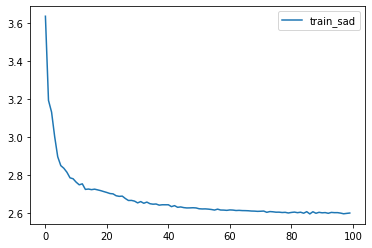

In [19]:
pyplot.plot(history_s.history['loss'], label='train_sad')
pyplot.legend()
pyplot.show()

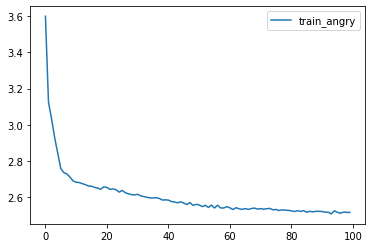

In [20]:
pyplot.plot(history_a.history['loss'], label='train_angry')
pyplot.legend()
pyplot.show()

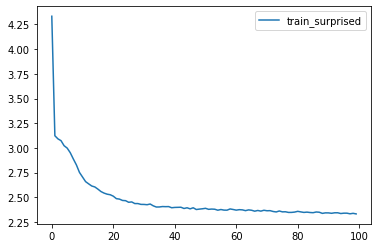

In [21]:
pyplot.plot(history_u.history['loss'], label='train_surprised')
pyplot.legend()
pyplot.show()

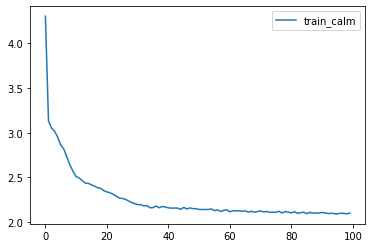

In [22]:
pyplot.plot(history_c.history['loss'], label='train_calm')
pyplot.legend()
pyplot.show()

In [23]:
#Test the model on the reamining data
#Do the math for including the accuracy of the emotion detection model, to figure out the accuracy drop in comparision to the new approach

In [24]:
y = sad.predict(test_X[:3600])

In [25]:
y

array([[15.392273],
       [15.392273],
       [15.392273],
       ...,
       [11.764723],
       [11.764723],
       [11.764723]], dtype=float32)

In [26]:
test_Y[:3600]

array([17, 17, 17, ..., 22, 22, 22])

In [27]:
error = 0
error = -np.array(y)+np.array(test_Y[:3600])
error = np.absolute(error)
error = np.sum(error)
error = error/3600

In [28]:
error

14619.263689566718

In [29]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(test_Y[:3600], y)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 4.056887753274705


In [30]:
y_test[1]

'sad'

In [31]:
y = surprised.predict(test_X[3600:7200])

In [32]:
y

array([[12.804903],
       [12.804903],
       [13.191253],
       ...,
       [18.183323],
       [18.183323],
       [18.183323]], dtype=float32)

In [33]:
test_Y[3600:7200]

array([22, 22, 22, ..., 22, 22, 22])

In [34]:
error = mae(test_Y[3600:7200], y)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 5.189282227953275


In [35]:
Data_s_t = np.array([])
Data_a_t = np.array([])
Data_u_t = np.array([])
Data_c_t = np.array([])

Data_s_s = np.array([])
Data_a_s = np.array([])
Data_u_s = np.array([])
Data_c_s = np.array([])

emotion = []

In [36]:
#Bifurgating the data, as that can be done during the learning process and the next set of inputs can be learned on
seconds_start = 0 #Seconds to adjust the data
seconds_end = 3600
y_pred = model.predict(x_test)
for vval in y_pred:
    #Stopping if going over the data limit
    emotion.append(vval)
    if seconds_start >= 86399*4:
        break
    if vval == "sad":
        #Model 1 gets trained here for 3600 rows of the data
        print("=========================SAD============================")
        #history_s = sad.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=30, batch_size=36, verbose=2, shuffle=False)
        #s_loss.extend(history_s.history['loss'])
        #sad.save("/Users/nishantacharya/Desktop/EBADL/sad")
        
        if Data_s_t.size == 0:
            Data_s_t = test_X[seconds_start:seconds_end]
            Data_s_s = test_Y[seconds_start:seconds_end]
        else:
            Data_s_t = np.concatenate((Data_s_t,test_X[seconds_start:seconds_end]),axis = 0)
            Data_s_s = np.concatenate((Data_s_s,test_Y[seconds_start:seconds_end]),axis = 0)
        
        seconds_start += 3600
        seconds_end += 3600
        
        
    if vval == "angry":
        #Model 2 gets trained here
        print("=========================ANGRY============================")
        #history_a = angry.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=30, batch_size= 36, verbose=2, shuffle=False)
        #a_loss.extend(history_a.history['loss'])
        #angry.save("/Users/nishantacharya/Desktop/EBADL/angry")
        
        if Data_a_t.size == 0:
            Data_a_t = test_X[seconds_start:seconds_end]
            Data_a_s = test_Y[seconds_start:seconds_end]
        else:
            Data_a_t = np.concatenate((Data_a_t,test_X[seconds_start:seconds_end]),axis = 0)
            Data_a_s = np.concatenate((Data_a_s,test_Y[seconds_start:seconds_end]),axis = 0)
        
        seconds_start += 3600
        seconds_end += 3600
        
        
    if vval == "surprised":
        #Model 3 gets trained here for 3600 secs
        print("=========================SURPRISED============================")
        #history_u = surprised.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=30, batch_size=36, verbose=2, shuffle=False)
        #u_loss.extend(history_u.history['loss'])
        #surprised.save("/Users/nishantacharya/Desktop/EBADL/surprised")
        
        if Data_u_t.size == 0:
            Data_u_t = test_X[seconds_start:seconds_end]
            Data_u_s = test_Y[seconds_start:seconds_end]
        else:
            Data_u_t = np.concatenate((Data_u_t,test_X[seconds_start:seconds_end]),axis = 0)
            Data_u_s = np.concatenate((Data_u_s,test_Y[seconds_start:seconds_end]),axis = 0)
        
        
        seconds_start += 3600
        seconds_end += 3600
        
        
        
    if vval == "calm":
        #Model 4 gets trained here
        print("=========================CALM============================")
        #history_c = calm.fit(train_X[seconds_start:seconds_end], train_Y[seconds_start:seconds_end], epochs=30, batch_size=36, verbose=2, shuffle=False)
        #c_loss.extend(history_c.history['loss'])
        #calm.save("/Users/nishantacharya/Desktop/EBADL/calm")
        
        if Data_c_t.size == 0:
            Data_c_t = test_X[seconds_start:seconds_end]
            Data_c_s = test_Y[seconds_start:seconds_end]
        else:
            Data_c_t = np.concatenate((Data_c_t,test_X[seconds_start:seconds_end]),axis = 0)
            Data_c_s = np.concatenate((Data_c_s,test_Y[seconds_start:seconds_end]),axis = 0)
        
        
        seconds_start += 3600
        seconds_end += 3600

=========================SAD============================
=========================SURPRISED============================
=========================ANGRY============================
=========================SAD============================
=========================SAD============================
=========================ANGRY============================
=========================SAD============================
=========================SURPRISED============================
=========================SAD============================
=========================SAD============================
=========================SAD============================
=========================SAD============================
=========================SAD============================
=========================ANGRY============================
=========================CALM============================
=========================ANGRY============================
=========================SURPRISED============================
====

In [37]:
#Predicting using the models
y_s = sad.predict(Data_s_t)
y_a = angry.predict(Data_a_t)
y_u = surprised.predict(Data_u_t)
y_c = calm.predict(Data_c_t)

In [38]:
#Checking mae error
error = mae(Data_s_s, y_s)
  
# display
print("Mean absolute error model-sad : " + str(error))


#Checking mae error
error = mae(Data_a_s, y_a)
  
# display
print("Mean absolute error model-angry : " + str(error))


#Checking mae error
error = mae(Data_u_s, y_u)
  
# display
print("Mean absolute error model-surprised : " + str(error))


#Checking mae error
error = mae(Data_c_s, y_c)
  
# display
print("Mean absolute error model-calm : " + str(error))

Mean absolute error model-sad : 2.290084569838312
Mean absolute error model-angry : 5.146147193492405
Mean absolute error model-surprised : 3.0808155904478496
Mean absolute error model-calm : 7.16274269873408


In [ ]:
#Same ballpark  as the original model
#Follow up with fineturning the data a bit more